<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Dilasi

Text(0.5, 1.0, 'Citra Hasil Dilasi')

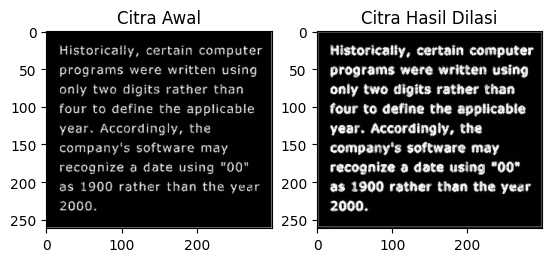

In [91]:
# function dilasi Cross
def func_dilasi (img, w):
  m, n = img.shape

  imgDilasi= np.zeros((m, n), dtype=np.uint8)

  kernel = cv.getStructuringElement(cv.MORPH_CROSS, (w,w))
  constant = (w-1) // 2

  for i in range(constant, m-constant):
      for j in range(constant, n-constant):
          temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
          product = temp * kernel
          imgDilasi[i,j] = np.max(product)

  return imgDilasi

# Read Image
morphology = cv.imread('/content/drive/MyDrive/PCVK/09/morphology.png',0)

# Kernel
j = 3

plt.subplot(121),plt.imshow(morphology, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(func_dilasi(morphology, j), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

[[0 1 0]
 [1 1 1]
 [0 1 0]]


Text(0.5, 1.0, 'Citra Hasil Dilasi')

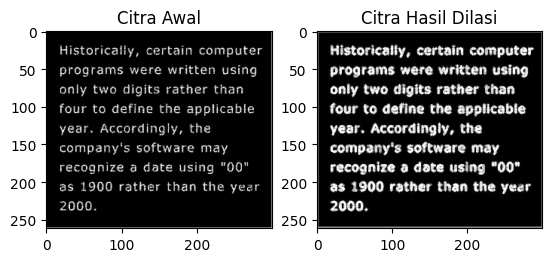

In [92]:
# Read Image
morphology1 = cv.imread('/content/drive/MyDrive/PCVK/09/morphology.png')

# Kernel
kernel1 = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

# Library Dilasi
dilasi = cv.dilate(morphology1, kernel1, iterations = 1)

print(kernel1)

plt.subplot(121),plt.imshow(morphology1, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilasi, cmap = 'gray')
plt.title('Citra Hasil Dilasi')

# Erosi

Text(0.5, 1.0, 'Citra Hasil Erosi')

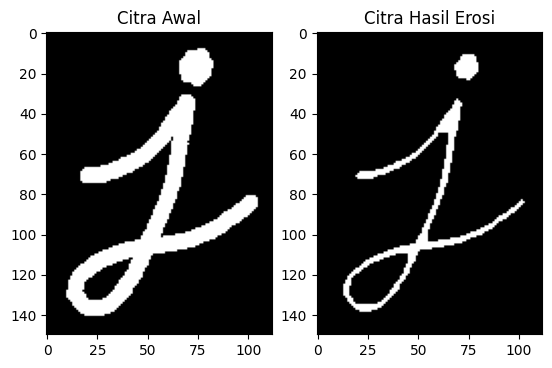

In [118]:
# Function Erosi Square
def func_erosi (img, w):
  m, n = img.shape

  kernel3 = np.ones((w,w), dtype=np.uint8)
  constant2 = (w-1) // 2

  imgErosi= np.zeros((m, n), dtype=np.uint8)

  for i in range(constant2, m-constant2): # (2, m-2)
      for j in range(constant2, n-constant2): #(2, n-2)
          temp1 = img[i-constant2:i+constant2+1, j-constant2:j+constant2+1]
          product1 = temp1 * kernel3
          imgErosi[i,j] = np.min(product1)

  return imgErosi

# Read Image
huruf1 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png',0)

# Kernel
k = 5

plt.subplot(121),plt.imshow(huruf1, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(func_erosi(huruf1, k), cmap = 'gray')
plt.title('Citra Hasil Erosi')

Text(0.5, 1.0, 'Citra Hasil Erosi')

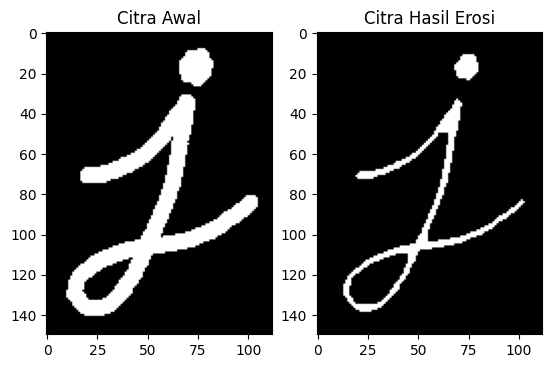

In [117]:
# Read Image
huruf = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

# Kernel
kernel2 = np.ones((5,5),dtype=np.uint8)

# Library Erosi
erosi = cv.erode(huruf, kernel2, iterations = 1)

plt.subplot(121),plt.imshow(huruf, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosi, cmap = 'gray')
plt.title('Citra Hasil Erosi')

# Opening

**Tanpa Library**

Text(0.5, 1.0, 'Citra Hasil Opening')

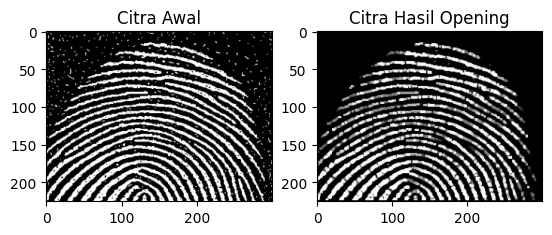

In [95]:
# Function Dilasi Square
def func_dilasi_square (img, w):
  m, n = img.shape

  imgDilasi= np.zeros((m, n), dtype=np.uint8)

  kernel = np.ones((w,w),dtype=np.uint8)
  constant = (w-1) // 2

  for i in range(constant, m-constant):
      for j in range(constant, n-constant):
          temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
          product = temp * kernel
          imgDilasi[i,j] = np.max(product)

  return imgDilasi

# read IMG
fingerprint = cv.imread('/content/drive/MyDrive/PCVK/09/fingerprint.png',0)

# kernel
l = 3

# operasi erosi
opening_erosi = func_erosi(fingerprint, l)

# operasi dilasi
opening_dilasi = func_dilasi_square(opening_erosi,l)

plt.subplot(121),plt.imshow(fingerprint, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(opening_dilasi, cmap = 'gray')
plt.title('Citra Hasil Opening')

**Menggunakan Library**

Text(0.5, 1.0, 'Citra Hasil Opening')

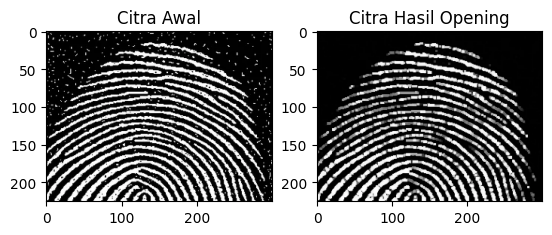

In [96]:
# Read Image
fingerprint2 = cv.imread('/content/drive/MyDrive/PCVK/09/fingerprint.png')

# Kernel
kernel3 = np.ones((3,3),dtype=np.uint8)

# library for opening using openCV
opening1 = cv.morphologyEx(fingerprint2, cv.MORPH_OPEN,kernel3)

plt.subplot(121),plt.imshow(fingerprint2, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(opening1, cmap = 'gray')
plt.title('Citra Hasil Opening')

# Closing

**Tanpa Library**

Text(0.5, 1.0, 'Citra Hasil Closing')

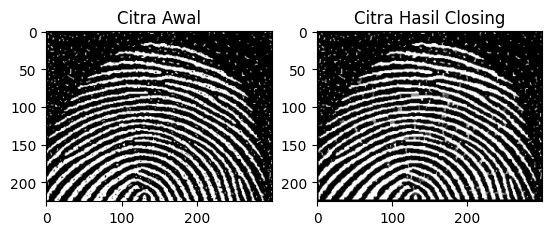

In [97]:
# Read Image
fingerprint3 = cv.imread('/content/drive/MyDrive/PCVK/09/fingerprint.png',0)

# kernel
m = 3

# Operasi Dilasi
closing_dilasi = func_dilasi_square(fingerprint3,m)

# operasi Erosi
closing_erosi = func_erosi(closing_dilasi,m)

plt.subplot(121),plt.imshow(fingerprint3, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(closing_erosi, cmap = 'gray')
plt.title('Citra Hasil Closing')

**Menggunakan Library**

Text(0.5, 1.0, 'Citra Hasil Closing')

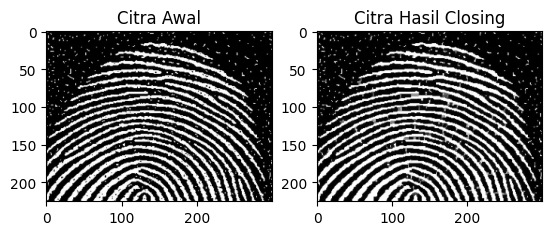

In [98]:
# Read Image
fingerprint4 = cv.imread('/content/drive/MyDrive/PCVK/09/fingerprint.png')

# Kernel
kernel4 = np.ones((3,3),dtype=np.uint8)

# Library Closing using OpenCV
closing1 = cv.morphologyEx(fingerprint4, cv.MORPH_CLOSE,kernel4)

plt.subplot(121),plt.imshow(fingerprint4, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(closing1, cmap = 'gray')
plt.title('Citra Hasil Closing')

# Dilasi

SED = Cross 3


Text(0.5, 1.0, 'Citra Hasil Dilasi')

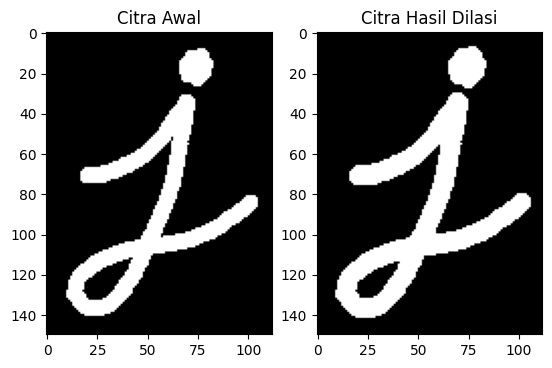

In [99]:
def cross_dilasi(img,se) :
  kernel = cv.getStructuringElement(cv.MORPH_CROSS, (se,se))

  dilate = cv.dilate(img, kernel)

  return dilate


huruf2 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

n = 3

print('SED = Cross '+  str(n))
plt.subplot(121),plt.imshow(huruf2, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(cross_dilasi(huruf2, n), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

SED = Cross 5


Text(0.5, 1.0, 'Citra Hasil Dilasi')

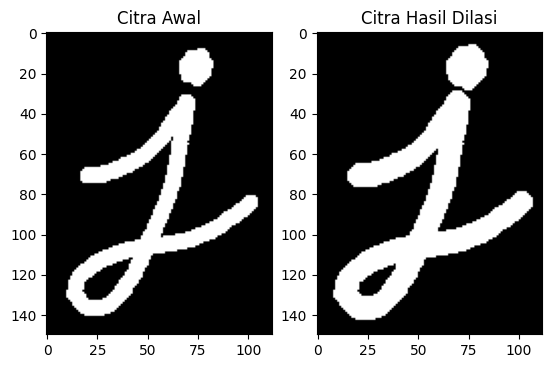

In [100]:
o = 5

print('SED = Cross '+  str(o))
plt.subplot(121),plt.imshow(huruf2, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(cross_dilasi(huruf2, o), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

SED = Cross 3


Text(0.5, 1.0, 'Citra Hasil Dilasi')

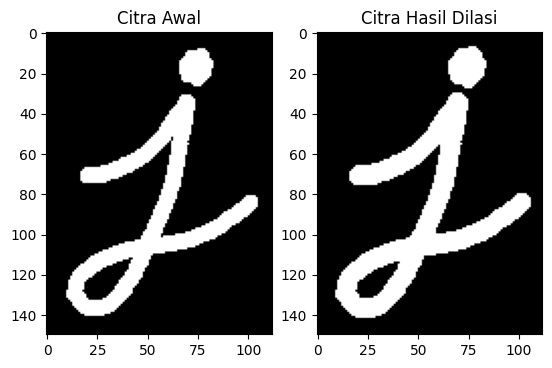

In [101]:
def circular_dilasi(img,se) :
  kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (se,se))

  dilate = cv.dilate(img, kernel)

  return dilate

huruf3 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

p = 3
print('SED = Cross '+  str(p))
plt.subplot(121),plt.imshow(huruf3, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(circular_dilasi(huruf3, p), cmap = 'gray')
plt.title('Citra Hasil Dilasi')


SED = Cross 5


Text(0.5, 1.0, 'Citra Hasil Dilasi')

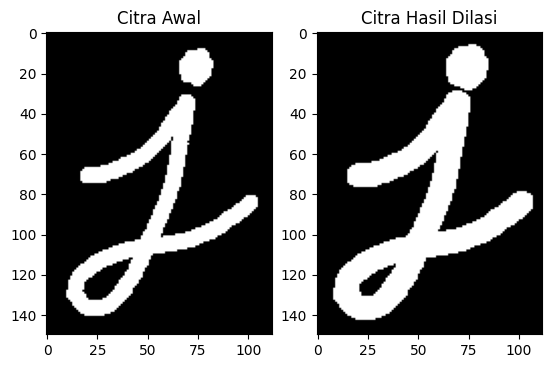

In [102]:
q = 5

print('SED = Cross '+  str(q))
plt.subplot(121),plt.imshow(huruf3, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(circular_dilasi(huruf3, q), cmap = 'gray')
plt.title('Citra Hasil Dilasi')

Text(0.5, 1.0, 'Citra Hasil Erosi')

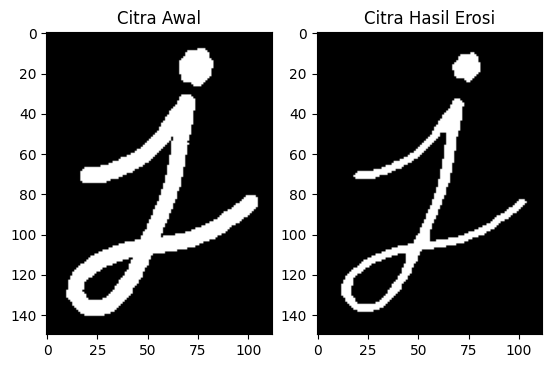

In [116]:
sed = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

huruf4 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

erode1 = cv.erode(huruf4, sed)

plt.subplot(121),plt.imshow(huruf4, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erode1, cmap = 'gray')
plt.title('Citra Hasil Erosi')

Text(0.5, 1.0, 'Citra Hasil Erosi')

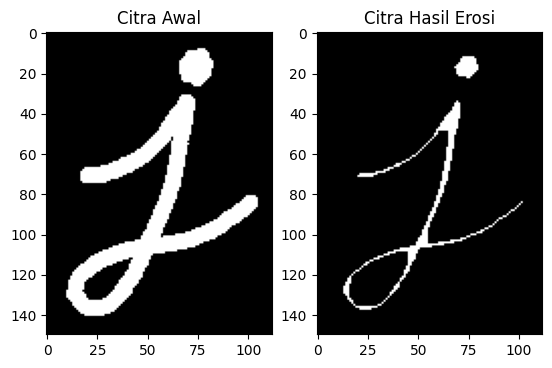

In [115]:
sed2 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

erode2 = cv.erode(huruf4,sed2)

plt.subplot(121),plt.imshow(huruf4, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erode2, cmap = 'gray')
plt.title('Citra Hasil Erosi')

Text(0.5, 1.0, 'Citra Hasil Erosi')

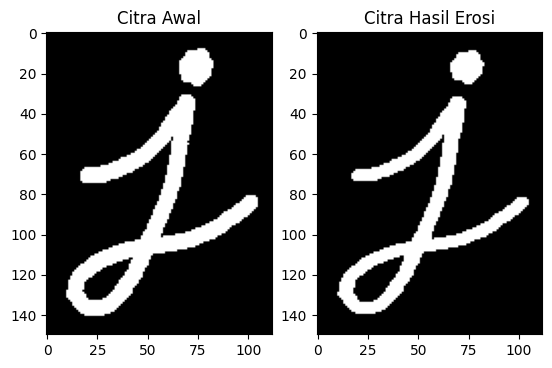

In [114]:
sed_line3 = np.zeros((3,1),dtype=np.uint8)
sed_line3[:,0] = 1

huruf5 = cv.imread('/content/drive/MyDrive/PCVK/09/j.png')

erode3 = cv.erode(huruf5,sed_line3)

plt.subplot(121),plt.imshow(huruf5, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erode3, cmap = 'gray')
plt.title('Citra Hasil Erosi')

Text(0.5, 1.0, 'Citra Hasil Erosi')

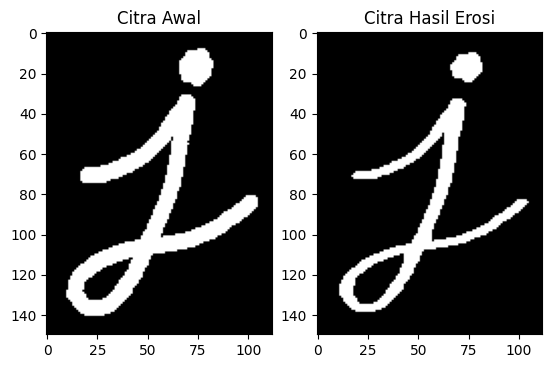

In [124]:
sed_line5 = np.zeros((5,1),dtype=np.uint8)
sed_line5[:,0] = 1

erode4 = cv.erode(huruf5,sed_line5)

plt.subplot(121),plt.imshow(huruf5, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erode4, cmap = 'gray')
plt.title('Citra Hasil Erosi')